In [31]:
import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

In [33]:
#veriyi içeri aktarıyoruz:
veri = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\taylor_swift_spotify.csv")
veri.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,71,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,70,193289


In [34]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        530 non-null    int64  
 1   name              530 non-null    object 
 2   album             530 non-null    object 
 3   release_date      530 non-null    object 
 4   track_number      530 non-null    int64  
 5   id                530 non-null    object 
 6   uri               530 non-null    object 
 7   acousticness      530 non-null    float64
 8   danceability      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  valence           530 non-null    float64
 16  popularity        530 non-null    int64  
 1

In [35]:
#veri temizleme:
veri.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [36]:
#sütun isimlerini degistirme
veri.rename(columns={'Unnamed: 0':'nums',
                     'uri':'url',
                    'track_number':'track_no'}, inplace = True)

In [37]:
#ilk 3 veriye bakalim
veri.head(3)

,nums,name,album,release_date,track_no,id,url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000


In [38]:
#yararı olmayan verilerin cikarilmasi:
#drop fonksiyonu ile nums sütununu cikaralim
veri = veri.drop(["nums"], axis = 1) #axis = 1 sütun demek
# axis = 0 ise row üzerinde islem yapılır
veri.head(5)

,name,album,release_date,track_no,id,url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,71,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,70,193289


In [44]:
#Kayıp veri sorunu
uniq_ident = pd.unique(veri.album) #-> her bir yeni degeri uniq_ident icerisine atar, 
#yani aynı album birden fazla geçiyorsa sadece bir kez görürüz onu burada
print("Num of albums: {}".format(len(uniq_ident)))
uniq_ident[:13] #baştan 13 tanesinde bulunan albümleri görelim

Num of albums: 27


array(["1989 (Taylor's Version) [Deluxe]", "1989 (Taylor's Version)",
       "Speak Now (Taylor's Version)", 'Midnights (The Til Dawn Edition)',
       'Midnights (3am Edition)', 'Midnights', "Red (Taylor's Version)",
       "Fearless (Taylor's Version)", 'evermore (deluxe version)',
       'evermore',
       'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]',
       'folklore (deluxe version)', 'folklore'], dtype=object)

In [ ]:
"""

#her bir albumu iteratif olarak dolasalim
#uniq_ident özelinde belirttiğim albümlerin danceability ve energy degerlerinin ortalamsini alalim
#kayıp danceability ve energy degeri varsa ortalama degerleri bu kayıp degerler yerine girelim
gecici_veri = veri.copy() #gercek veriyi bozmamak icin bir kopyasini olusturduk
dance_energy_list = ["danceability", "energy"]

for i in uniq_ident:
    #etkinlik filtresi olsuturalim:
    filter_album = gecici_veri.album == i
    #veriyi bu filtreye göre filtreleyelim:
    filtered_data = gecici_veri[filter_album]
    
    #danceability ve energy için albümler özelinde ortalamaları hesaplayalım
    for x in dance_energy_list:
        ortalama = np.round(np.mean(filtered_data[x]),2)
        if np.isnan(ortalama): #eğer not a number degeri yoksa (non val is true)
            filtered_data[x] = filtered_data[x].fillna(ortalama) #ortalama degeri ile doldur none kısımları
        else:
            tum_veri_ortalamasi = np.round(np.mean(veri[x]),2)
            filtered_data[x] = filtered_data[x].fillna(tum_veri_ortalamasi)
    #kayıp degerleri doldurulmus olan veriyi gecici_veri'ye aktaralim:
    gecici_veri[filter_album] = filtered_data
    
#kayip degerleri giderilen gecici veriyi gercek veriye esitle
veri = gecici_veri.copy()
veri.info() #dance ve energy sütunlarında kayıp deger sayısına bakalım 

"""

In [ ]:
#sonradan veriyi kullanabilmek icin veriyi kaydedelim
# veri.to_csv("duzenlenmis_veri.csv",index = False)

In [60]:
#Veri Analizi
#histogram grafikleri -> input : degisken/ column ismi, output : ilgili degiskenin histogramı  
def plotHistogram(degisken):
    plt.figure()
    plt.hist(veri[degisken], bins = 40, color = "lightblue") #hist fonksiyonu histogram cizer -> 40 aralıga böldürdük
    plt.xlabel(degisken)
    plt.ylabel("frequency") #görülme sıklığı
    plt.title("frequency of datas - {}".format(degisken)) #title of the graph
    plt.show()

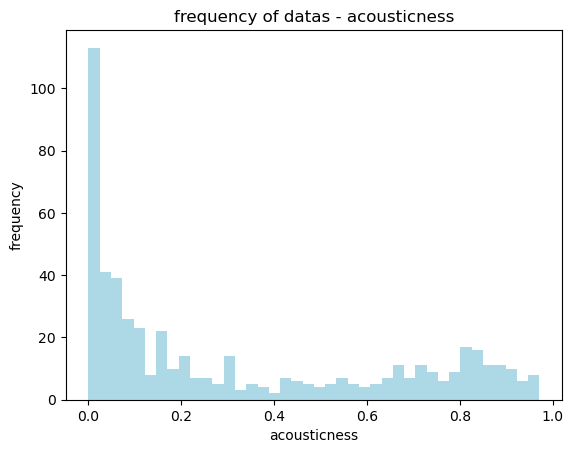

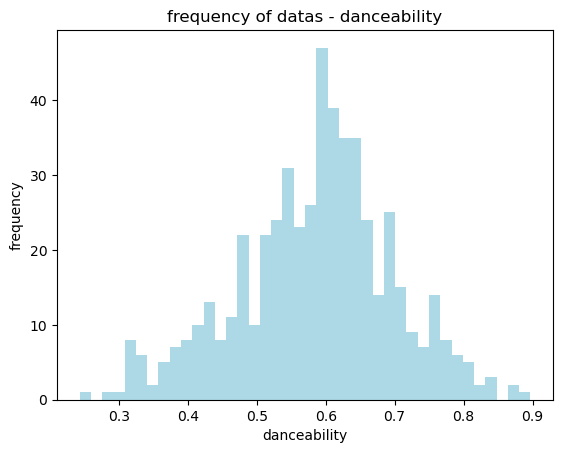

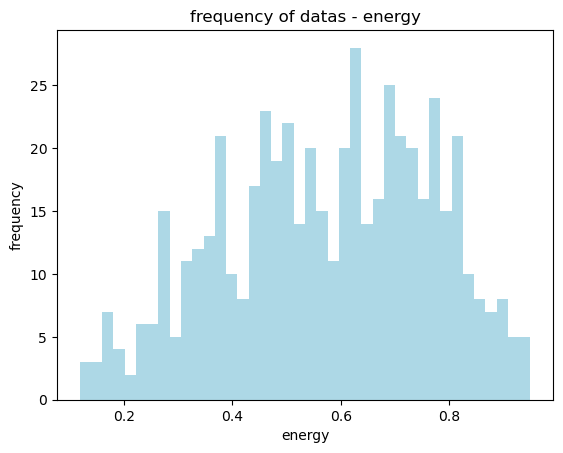

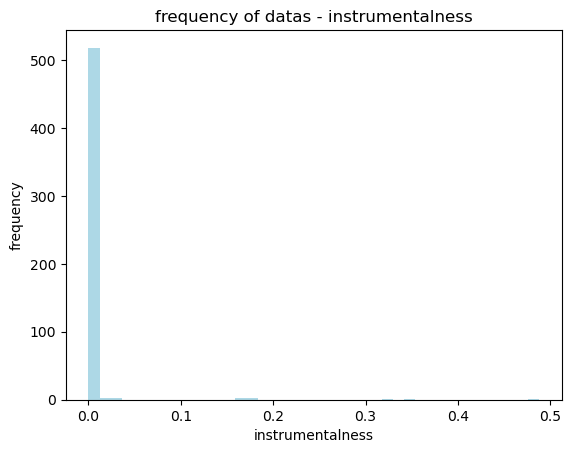

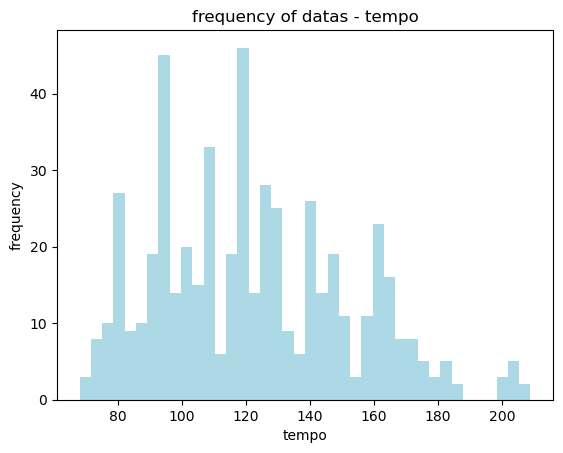

In [61]:
#tüm sayısal degerler icin histogram cizdirelim
numeric_var = ["acousticness","danceability","energy","instrumentalness","tempo"]
for i in numeric_var:
    plotHistogram(i) #yukarıda belirttiğim 5 değişken için 5 farklı histogram çizmesini bekliyorum

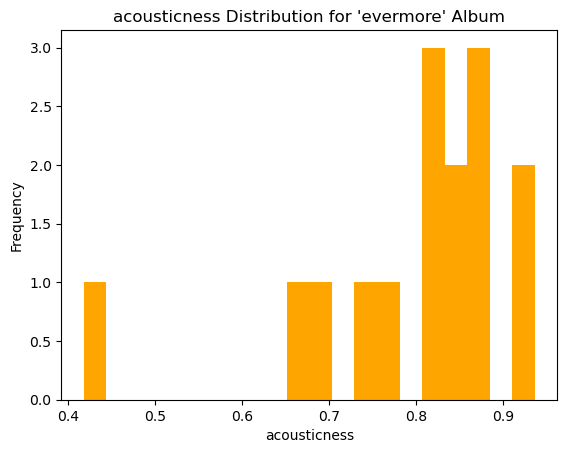

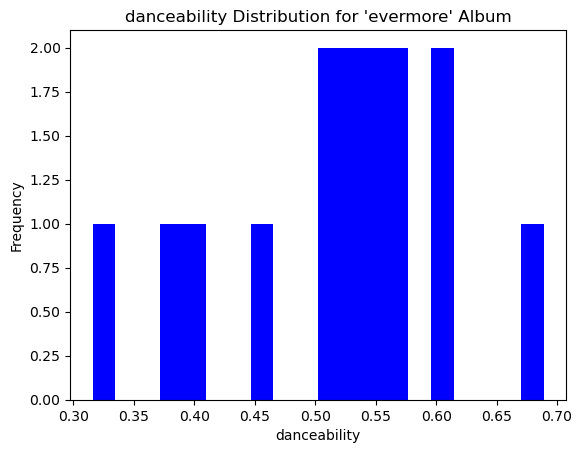

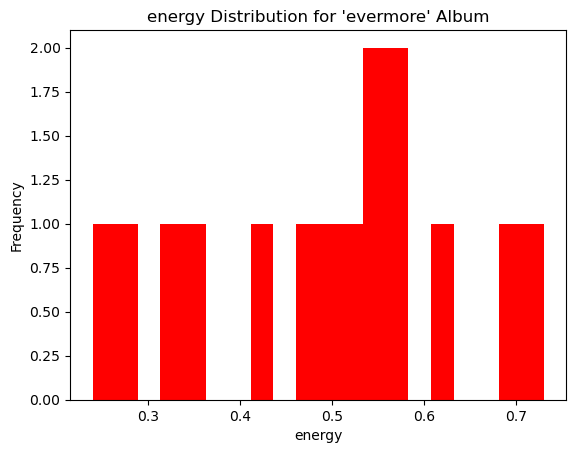

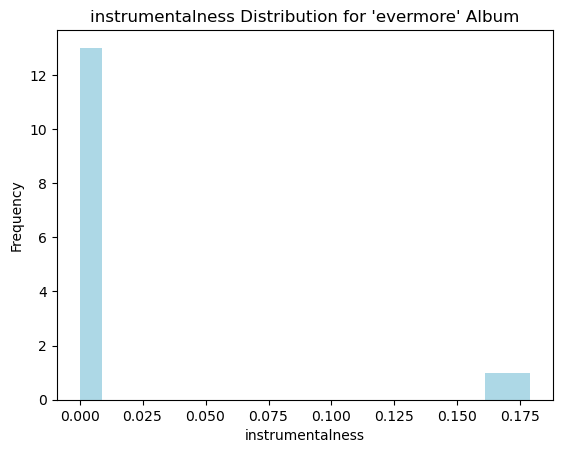

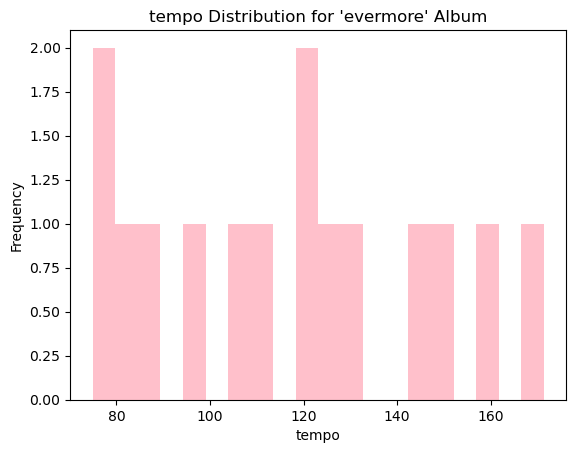

In [73]:
df = pd.DataFrame(veri)
# evermore albümü için filtreleme yapalım
evermore_df = df[df["album"] == "evermore"]
#"df" isimli veri çerçevesinden "album" sütununda "evrmore" değerine sahip olan satırları filtreler

# Belirtilen sütunlar için histogramları çizelim
colors = ['orange', 'blue', 'red', 'lightblue', 'pink']  # farklı renkler
# her bir histogram için numeric_var listesindeki öğenin indeksini kullanarak colors listesinden uygun rengi alıyoruz:
for var in numeric_var:
    plt.figure() #önce bir figure oluşturuyoruz
    plt.hist(evermore_df[var], bins=20, color=colors[numeric_var.index(var)]) #sonra graph için fonksiyon ve parametreleri (veri, aralık vs.)
    plt.title(f"{var} Distribution for 'evermore' Album")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [74]:
veri.describe()

,track_no,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,11.184906,0.319247,0.585285,0.574609,0.004005,0.163492,-7.505434,0.055889,122.332311,0.397379,62.777358,239978.624528
std,7.981060,0.327043,0.113121,0.191565,0.033163,0.142263,2.939040,0.070300,30.000272,0.199589,15.224702,46119.983031
min,1.000000,0.000184,0.243000,0.118000,0.000000,0.035700,-17.932000,0.023100,68.097000,0.037400,32.000000,83253.000000
25%,5.000000,0.036250,0.516000,0.443000,0.000000,0.096600,-9.222000,0.030325,96.939500,0.230000,50.000000,211813.000000
50%,10.000000,0.165000,0.595500,0.589500,0.000002,0.115000,-7.012000,0.037300,119.030000,0.385500,68.000000,235273.000000
75%,15.000000,0.653000,0.653000,0.729750,0.000056,0.163000,-5.361750,0.055225,143.934250,0.535000,74.000000,260361.000000
max,46.000000,0.971000,0.897000,0.950000,0.488000,0.931000,-1.909000,0.912000,208.918000,0.943000,99.000000,613026.000000


In [76]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   release_date      530 non-null    object 
 3   track_no          530 non-null    int64  
 4   id                530 non-null    object 
 5   url               530 non-null    object 
 6   acousticness      530 non-null    float64
 7   danceability      530 non-null    float64
 8   energy            530 non-null    float64
 9   instrumentalness  530 non-null    float64
 10  liveness          530 non-null    float64
 11  loudness          530 non-null    float64
 12  speechiness       530 non-null    float64
 13  tempo             530 non-null    float64
 14  valence           530 non-null    float64
 15  popularity        530 non-null    int64  
 16  duration_ms       530 non-null    int64  
dt

In [86]:
#çubuk grafikleri:
def plotBar(degisken, n=10):
    veri_ = veri[degisken]
    veri_count = veri_.value_counts()
    veri_count = veri_count[:n]
    plt.figure()
    plt.bar(veri_count.index, veri_count, color = "pink")
    plt.xticks(veri_count.index, veri_count.index.values)
    plt.xticks(rotation = 45)
    plt.ylabel("frequency")
    plt.title("veri sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken,veri_count))

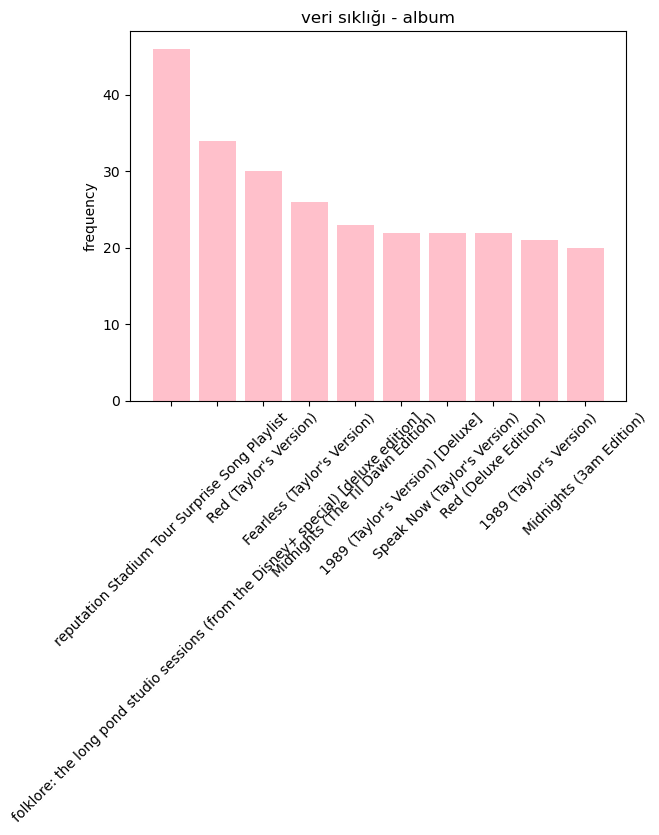

album: 
 album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
1989 (Taylor's Version) [Deluxe]                                                       22
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version)                                                                21
Midnights (3am Edition)                                                                20
Name: count, dtype: int64


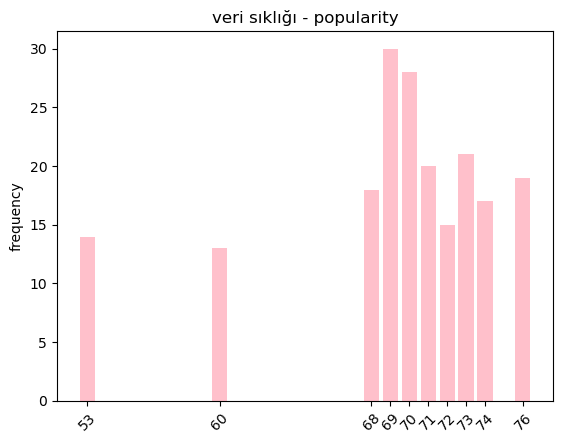

popularity: 
 popularity
69    30
70    28
73    21
71    20
76    19
68    18
74    17
72    15
53    14
60    13
Name: count, dtype: int64


In [87]:
kategorik_degisken = ["album","popularity"]
for i in kategorik_degisken:
    plotBar(i)

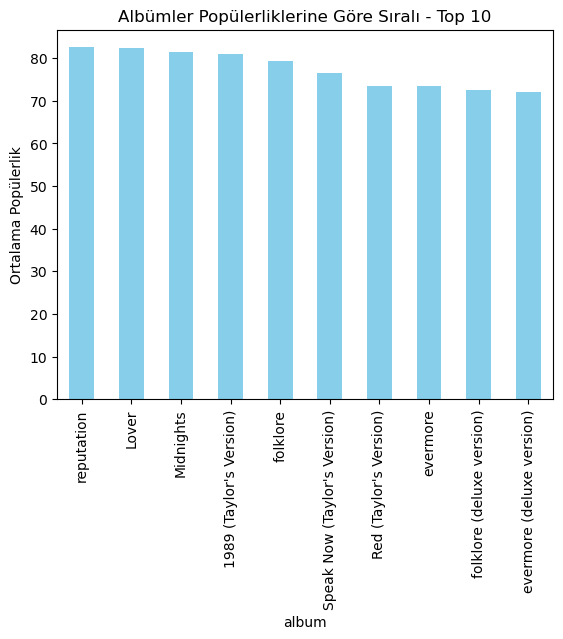

In [100]:
# plotBar fonksiyonunu tanımlayalım
def plotBar2(degisken, n=10):
    veri_grouped = veri.groupby(degisken)['popularity'].mean().sort_values(ascending=False)[:n]
    plt.figure()
    veri_grouped.plot(kind='bar', color='skyblue')
    plt.xlabel(degisken)
    plt.ylabel('Ortalama Popülerlik')
    plt.title('Albümler Popülerliklerine Göre Sıralı - Top {}'.format(n))
    plt.xticks(rotation=90) #etiketlerin duruş açısını ayarlıyoruz bununla    
    plt.show()

# plotBar fonksiyonunu kullanarak albümleri popülerliğine göre sıralayalım
plotBar2("album")

In [102]:
#sayısal sütunlar arasında ilişki incelemesi
veri.loc[:,["tempo","popularity","energy"]].corr() #korelasyon tablosu

,tempo,popularity,energy
tempo,1.000000,-0.016184,0.188427
popularity,-0.016184,1.000000,-0.091544
energy,0.188427,-0.091544,1.000000


In [103]:
#anomali tespiti:
"""
def anomaliTespiti(df,ozellik):
    outlier_indices = []
    
    for c in ozellik:
        #1. çeyrek
        Q1 = np.percentile(df[c],25)
        #3. çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Quartile Range
        IQR = Q3 - Q1
        #aykırı deger icin ek adım miktarı
        outlier_step = 1.5*IQR
        #aykırı değeri ve bulunduğu indeksi tespit edelim:
        outlier_list_col = df[df[c] < Q1-outlier_step | df[c] > Q3+outlier_step].index
        #tespit edilen indeksleri depolayalım
        outlier_indices.extend(outlier_list_col)
        
        #eşsiz aykırı degerleri bulalım
        outlier_indices = Counter(outlier_indices)
        
        #eger bir örnek v adet sütunda farklı deger ise bunu aykırı kabul edelim:
        multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
        
        return multiple_outliers
"""

In [ ]:
#veri_anomali = veri.loc[anomaliTespiti(veri,["tempo","popularity","energy"])]

In [105]:
#albümlerin yayınlanma tarihlerini sıralayalım
veri_zaman = veri.copy() #verinin orijinalini bozmamak icin kopyasını olusturduk
unique_dates = veri_zaman.release_date.unique()
unique_dates #çıktıyı görebilmek icin

array(['2023-10-27', '2023-10-26', '2023-07-07', '2023-05-26',
       '2022-10-22', '2022-10-21', '2021-11-12', '2021-04-09',
       '2021-01-07', '2020-12-11', '2020-11-25', '2020-08-18',
       '2020-07-24', '2019-08-23', '2017-11-10', '2017-11-09',
       '2014-10-27', '2012-10-22', '2010-10-25', '2008-11-11',
       '2008-06-28', '2006-10-24'], dtype=object)

In [107]:
#tarihi eskiden yeniye dogru sıralayabilmek icin:
sırala_list = np.sort(veri_zaman.release_date.unique())
sırala_list

array(['2006-10-24', '2008-06-28', '2008-11-11', '2010-10-25',
       '2012-10-22', '2014-10-27', '2017-11-09', '2017-11-10',
       '2019-08-23', '2020-07-24', '2020-08-18', '2020-11-25',
       '2020-12-11', '2021-01-07', '2021-04-09', '2021-11-12',
       '2022-10-21', '2022-10-22', '2023-05-26', '2023-07-07',
       '2023-10-26', '2023-10-27'], dtype=object)

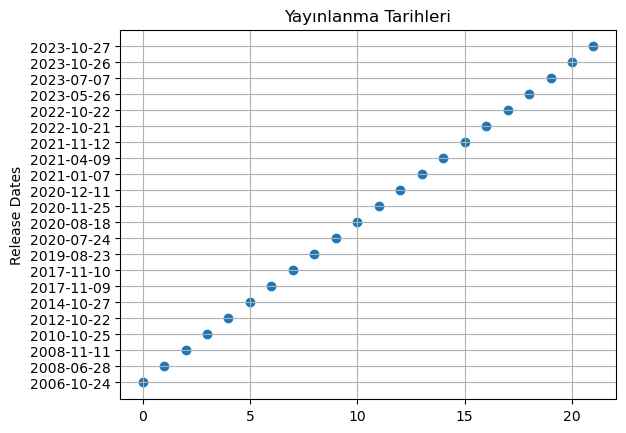

In [110]:
plt.figure()
plt.scatter(range(len(sırala_list)), sırala_list) #saçılım grafigi
plt.grid(True)
plt.ylabel("Release Dates")
plt.title("Yayınlanma Tarihleri")
plt.show()
#yayınlanma tarihinde kaç albümün oldugunu? bulmus olduk?